<a href="https://colab.research.google.com/github/pauljainta/CNN-backpropagation/blob/main/CNN_Backprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
from tensorflow.keras import datasets

import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import f1_score , accuracy_score


**LOAD DATA**

In [199]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = datasets.mnist.load_data()

In [200]:
# y_train_mnist = y_train_mnist.reshape(-1 , 1)
# y_test_mnist = y_test_mnist.reshape(-1 , 1)


print(x_train_mnist.shape)
print(y_train_mnist.shape)
print(y_test_mnist.shape)


(60000, 28, 28)
(60000,)
(10000,)


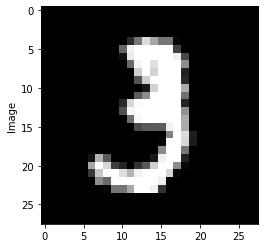

In [201]:
plt.ylabel("Image")
plt.imshow(x_train_mnist[10, :], cmap='gray')

In [202]:
type(x_train_mnist)

numpy.ndarray

In [203]:
x_train_mnist = x_train_mnist[ :,np.newaxis]
print(x_train_mnist.shape)



(60000, 1, 28, 28)


In [204]:
x_test_mnist = x_test_mnist[ :,np.newaxis]
print(x_test_mnist.shape)
print(y_test_mnist.shape)
size_of_each_batch = 32

(10000, 1, 28, 28)
(10000,)


In [205]:
(x_train_cifer, y_train_cifer), (x_test_cifer, y_test_cifer) = datasets.cifar10.load_data()

In [206]:
print(x_train_cifer.shape)
print(y_train_cifer.shape)

(50000, 32, 32, 3)
(50000, 1)


In [207]:
x_train_cifer = np.transpose(x_train_cifer , (0 , 3 ,1 ,2 ))

x_test_cifer = np.transpose(x_test_cifer , (0 , 3 ,1 ,2 ))



In [208]:
print(x_train_cifer.shape)
print(y_train_cifer.shape)

(50000, 3, 32, 32)
(50000, 1)


In [209]:
def Batch_Creation(x , y):
  
    global size_of_each_batch

    total_number_of_batches = int(math.floor(y.shape[0] / size_of_each_batch))
    list_of_mini_batches = []

    for i in range(total_number_of_batches):
      if y.shape[0] % size_of_each_batch != 0 and i == total_number_of_batches-1 :
        list_of_mini_batches.append((x[i*size_of_each_batch:, :] , y[i*size_of_each_batch:] ))

      list_of_mini_batches.append((x[i*size_of_each_batch:(i+1)*size_of_each_batch , :] , y[i*size_of_each_batch:(i+1)*size_of_each_batch]))
   
    return list_of_mini_batches


In [210]:
# size_of_each_batch = 128
# batches = Batch_Creation(x_train_mnist , y_train_mnist)
# print(len(batches))
# print(batches[0][1].shape)

In [211]:
def zero_padding(x , padding):
  return np.pad(x, ((0, 0), (0, 0), (padding, padding), (padding, padding)), mode='constant')

In [212]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_padding(x, 2)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1,1])
print ("x_pad[1,1] =\n", x_pad[1,1])

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 3, 7, 6)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.90085595 -0.68372786  0.          0.        ]
 [ 0.          0.         -0.12289023 -0.93576943  0.          0.        ]
 [ 0.          0.         -0.26788808  0.53035547  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]]


In [213]:
def convolutional_layer_forward(stride , padding , w , b , x):

    padded_x = zero_padding(x , padding)

    N = x.shape[0]
    C = x.shape[1]
    H = x.shape[2]
    W = x.shape[3]

    F = w.shape[0]
    FH = w.shape[2]
    FW = w.shape[3]

    W2 = int((W - FW + 2*padding)/stride + 1)
    H2 = int((H - FH + 2*padding)/stride + 1)

    all_selected_column_x = np.zeros((C * FH * FW, H2 * W2))
    all_selected_row_w = w.reshape(F, C * FH * FW)

    output = np.zeros((N, F, H2, W2))


    for i in range(N):
        column = 0
        for j in range(0, padded_x.shape[2] + 1 - FH, stride):
            for k in range(0, padded_x.shape[3]  + 1 - FW, stride):
                temp = padded_x[i, :, j:j+FH, k:k+FW]
                all_selected_column_x[:, column] = temp.reshape(C * FH * FW)
                column += 1
        
        current_unit_output = np.dot(all_selected_row_w, all_selected_column_x) + (b.reshape(-1, 1))
        output[i, :, :, :] = current_unit_output.reshape(F, H2, W2)

  
    return output, (stride, padding , w , b , x)


In [214]:
# w1 = np.random.normal(0.0, 0.01, (6, 1, 5, 5))
# b1 = np.zeros((6, ))

# out1 , cache1 = convolutional_layer_forward(1 , 2 , w1 , b1 , batches[0][0])

# print(out1.shape)

In [215]:
def relu_forward(x):
  return np.maximum(0 , x) , x

In [216]:
# out2 , cache2 = relu_forward(out1)

# print(out2[0])

In [217]:
def pooling_layer_forward(stride , filter_dimension , x):
  N = x.shape[0]
  C = x.shape[1]
  H = x.shape[2]
  W = x.shape[3]

  H2 = math.floor((H - filter_dimension) / stride) + 1
  W2 = math.floor((W - filter_dimension) / stride) + 1

  output = np.zeros((N, C, H2, W2))

  for i in range(N):
      current_unit_output = np.zeros((C, H2* W2))
      column = 0
      for j in range(0, H - filter_dimension + 1, stride):
          for k in range(0, W - filter_dimension + 1, stride):
              selected_block_of_x = x[i, :, j:j+filter_dimension, k:k+filter_dimension]
              selected_block_of_x = selected_block_of_x.reshape(C, filter_dimension ** 2)

              max_value_from_current_block = np.max(selected_block_of_x, axis=1)
              current_unit_output[:, column] = max_value_from_current_block

              column += 1
              
      output[i, :, :, :] = current_unit_output.reshape(C, H2 , W2)

  return output, (filter_dimension , stride , x) 


In [218]:
# out3 , cache3 = pooling_layer_forward(2 , 2 , out2)

# print(out3.shape)
# print(out3[0])

In [219]:
def fc_layer_forward(x, w, b):
  N = x.shape[0]
  C = x.shape[1]
  H = x.shape[2]
  W = x.shape[3]
 
  
  return np.dot(x.reshape(N , C * H * W) , w) + b , (w , b , x) 

In [220]:
# w2 = np.random.normal(0.0, 0.01, (6*14*14, 10))
# b2 = np.zeros((10, ))

# out4 , cache4 = fc_layer_forward(out3 , w2 , b2)
# print(out4.shape)


In [221]:
def softmax_activation(predict , y_hat , y):
  y_hat = y_hat - np.max(y_hat, axis=1, keepdims=True)
  
  probs = np.exp(y_hat) / np.sum(np.exp(y_hat) , axis = 1 , keepdims=True)

  if predict == True:
    return probs

  No_of_samples = probs.shape[0]
    
  average_loss = np.sum(np.log(probs[np.arange(No_of_samples), y])) / No_of_samples

  average_loss = average_loss * (-1)

  derivative = np.copy(probs)
  derivative[np.arange(No_of_samples), y] -= 1
  # derivative = probs[np.arange(No_of_samples), y] - 1

  return probs ,  average_loss, derivative / No_of_samples 

In [222]:
# probs , average_loss , derivative = softmax_activation(False , out4 , batches[0][1])

# print(probs[0])
# print(derivative[0])
# print(average_loss)

In [223]:
def fc_layer_backward(dout, cache):
    w = cache[0]
    x = cache[2]

    dx = np.dot(dout, w.T).reshape(x.shape)
    dw = np.dot(x.reshape(x.shape[0], -1).T, dout)
    db = np.sum(dout.T, axis=1)

    return dw, db , dx

In [224]:
# dw4 , db4 , dx4 = fc_layer_backward(out4 , cache4)
# print(dw4.shape)
# print(db4.shape)
# print(dx4.shape)

In [225]:
def pooling_layer_backward(dout, cache):
  
  filter_dimension , stride , x = cache 
  N = x.shape[0]
  C = x.shape[1]
  H = x.shape[2]
  W = x.shape[3]
  H2 = dout.shape[2]
  W2 = dout.shape[3]

  dx = np.zeros_like(x)

  for i in range(N):
      current_unit_output = dout[i, :].reshape(C, H2 * W2)
      column = 0
      for j in range(0, H + 1 - filter_dimension, stride):
          for k in range(0, W + 1 - filter_dimension, stride): 
              selected_block_of_x = x[i, :, j:j+filter_dimension, k:k+filter_dimension]
              selected_block_of_x = selected_block_of_x.reshape(C, filter_dimension ** 2)

              index_of_max_value_from_current_block = np.argmax(selected_block_of_x, axis=1)

              current_unit_output_block = current_unit_output[:, column]

              selected_block_of_x_dx_pooling = np.zeros_like(selected_block_of_x)
              selected_block_of_x_dx_pooling[np.arange(C), index_of_max_value_from_current_block] = current_unit_output_block

              dx[i, :, j:j+filter_dimension, k:k+filter_dimension] = selected_block_of_x_dx_pooling.reshape(C, filter_dimension, filter_dimension)

              column += 1
  
  return dx

In [226]:
# dx3 = pooling_layer_backward(dx4 , cache3)

# print(dx3.shape)

In [227]:
def relu_backward(dout, cache):
   
    dx = dout * (cache > 0)

    return dx

In [228]:
# dx2 = relu_backward(dx3 , cache2)

# print(dx2.shape)

In [229]:
def convolutional_layer_backward(dout, cache):

  H2 = dout.shape[2]
  W2 = dout.shape[3]
  stride, pad , w , b , x = cache 
  N = x.shape[0]
  C = x.shape[1]
  F = w.shape[0]
  FH = w.shape[2]
  FW = w.shape[3]


  dw = np.zeros_like(w)
  db = np.zeros_like(b) 
  dx = np.zeros_like(x)

  padded_x = zero_padding(x , pad)

  all_selected_row_w= w.reshape(F, C * FH * FW)
  all_selected_col_x = np.zeros((C * FH * FW, H2 * W2))

  for i in range(N):
      current_padded_dx = np.zeros(padded_x.shape[1:])
      column = 0
      current_unit_dout = dout[i, :, :, :].reshape(F, H2 * W2)
      current_unit_output = np.dot(all_selected_row_w.T, current_unit_dout)
      for j in range(0, padded_x.shape[2]- FH + 1, stride):
          for k in range(0, padded_x.shape[3] - FW + 1, stride):
            all_selected_col_x[:, column] = padded_x[i, :, j:j+FH, k:k+FW].reshape(C * FH * FW) 
            current_padded_dx[:, j:j+FH, k:k+FW] += current_unit_output[:, column].reshape(C, FH, FW)
            column += 1

      if pad == 0:
        dx[i] = current_padded_dx
      else:
        dx[i] = current_padded_dx[:, pad:-pad, pad:-pad]
      
      db += np.sum(current_unit_dout, axis=1)
      temp_dot = np.dot(current_unit_dout, all_selected_col_x.T) 
      temp_dot = temp_dot.reshape(F , C , FH , FW)

      dw += temp_dot
      

  return  dw, db , dx

In [230]:
# dw1 , db1 , dx1 = convolutional_layer_backward(dx2 , cache1)

# print(dw1.shape)

In [231]:
def update_weights(W , B , DW , DB , alpha):
  for i in range(len(W)):
    W[i] = W[i] - (alpha * DW[i])

  for i in range(len(B)):
    B[i] = B[i] - (alpha * DB[i])

  return W , B



In [232]:
def Train_Model(batches , epoch , alpha):

  global x_test_mnist 
  global y_test_mnist

  global x_test_cifer 
  global y_test_cifer

  w1 = np.random.normal(0.0, 0.01, (6, 1, 5, 5))
  b1 = np.zeros((6, ))

  w2 = np.random.normal(0.0, 0.01, (12, 6, 5, 5))
  b2 = np.zeros((12, ))

  w3 = np.random.normal(0.0, 0.01, (100, 12, 5, 5))
  b3 = np.zeros((100, ))

  w4 = np.random.normal(0.0, 0.01, (100*1*1, 10))
  b4 = np.zeros((10,))

  # w1 = np.random.normal(0.0, 0.01, (6, 3, 5, 5))
  # b1 = np.zeros((6, ))

  # w2 = np.random.normal(0.0, 0.01, (12, 6, 5, 5))
  # b2 = np.zeros((12, ))

  # w3 = np.random.normal(0.0, 0.01, (100, 12, 5, 5))
  # b3 = np.zeros((100, ))

  # w4 = np.random.normal(0.0, 0.01, (100*2*2, 10))
  # b4 = np.zeros((10,))

  W = [w1 , w2 , w3 , w4]
  B = [b1 , b2 ,b3 , b4]



  for _ in range(epoch):

    for batch in batches:
      x , y = batch 
  # forward prop
      out1 , cache1 = convolutional_layer_forward(1 , 2 , w1 , b1 , x)

      out2 , cache2 = relu_forward(out1)

      out3 , cache3 = pooling_layer_forward(2 , 2 , out2)

      out4 , cache4 = convolutional_layer_forward(1 , 0 , w2 , b2 , out3)

      out5 , cache5 = relu_forward(out4)

      out6 , cache6 = pooling_layer_forward(2 , 2 , out5)

      out7 , cache7 = convolutional_layer_forward(1 , 0 , w3 , b3 , out6)

      out8 , cache8 = relu_forward(out7)

      out9 , cache9 = fc_layer_forward(out8 , w4 , b4)
  # loss calculation
      probs , loss , derivative = softmax_activation(False , out9 , y)
  # back prop
      dw4 , db4 , dout9 = fc_layer_backward(derivative , cache9)
      dout8 = relu_backward(dout9 , cache8)
      dw3 , db3 , dout7 = convolutional_layer_backward(dout8 , cache7)

      dout6 = pooling_layer_backward(dout7 , cache6)
      dout5 = relu_backward(dout6 , cache5)
      dw2 , db2 , dout4 = convolutional_layer_backward(dout5 , cache4)

      dout3 = pooling_layer_backward(dout4 , cache3)
      dout2 = relu_backward(dout3 , cache2)
      dw1 , db1 , dout1 = convolutional_layer_backward(dout2 , cache1)

      DW = [dw1 , dw2 , dw3 , dw4]
      DB = [db1 , db2 ,db3 , db4]

      [w1 , w2 , w3 , w4] , [b1 , b2 ,b3 , b4]  = update_weights(W , B , DW , DB , alpha)
    
    _ , accuracy , macro_f1_score = Predict([w1 , w2 , w3 , w4] , [b1 , b2 ,b3 , b4] , x_test_mnist , y_test_mnist)

    print("Epoch:" + str(epoch+1) + "Accuracy:" + str(accuracy) + " Macro F1 Score :" + str(macro_f1_score))


  return [w1 , w2 , w3 , w4] , [b1 , b2 ,b3 , b4]








In [233]:
def Predict(W  , B , x , y):
  [w1 , w2 , w3 , w4] = W
  [b1 , b2 , b3 , b4] = B

  out1 , cache1 = convolutional_layer_forward(1 , 2 , w1 , b1 , x)

  out2 , cache2 = relu_forward(out1)

  out3 , cache3 = pooling_layer_forward(2 , 2 , out2)

  out4 , cache4 = convolutional_layer_forward(1 , 0 , w2 , b2 , out3)

  out5 , cache5 = relu_forward(out4)

  out6 , cache6 = pooling_layer_forward(2 , 2 , out5)

  out7 , cache7 = convolutional_layer_forward(1 , 0 , w3 , b3 , out6)

  out8 , cache8 = relu_forward(out7)

  out9 , cache9 = fc_layer_forward(out8 , w4 , b4)
# loss calculation
  probs  = softmax_activation(True , out9 , y)

  predictions = np.argmax(probs, axis=1)
  accuracy = accuracy_score(y , predictions)
  macro_f1_score = f1_score(y , predictions , average='macro' , zero_division = 1)

  return predictions , accuracy , macro_f1_score 





In [ ]:
size_of_each_batch = 32
batches = Batch_Creation(x_train_mnist , y_train_mnist)
# print(len(batches))
# print(batches[0][1].shape)

W , B = Train_Model(batches , 5 , 0.01)

# predictions , accuracy = Predict(W , B , x_test_mnist , y_test_mnist)
# print(predictions)
# print(accuracy)



In [ ]:
# size_of_each_batch = 32
# batches = Batch_Creation(x_train_cifer , y_train_cifer)
# # print(len(batches))
# print(batches[0][1].shape)

# W , B = Train_Model(batches , 5 , 0.01)

# predictions , accuracy = Predict(W , B , x_test_cifer , y_test_cifer)
# print(predictions)
# print(accuracy)